<a href="https://colab.research.google.com/github/AdamPoi/PCVK/blob/main/PCVK_week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul 11 - MetodeDeteksiObjek: TemplateMatching,Edge Detection,CornerDetection,GridDetection,ContourDetection

## Latihan Praktikum
1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive

In [6]:
drive.mount('/content/drive/')

Mounted at /content/drive/


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

## Template Matching


(<Axes: title={'center': 'Template Image'}>,
 Text(0.5, 1.0, 'Template Image'))

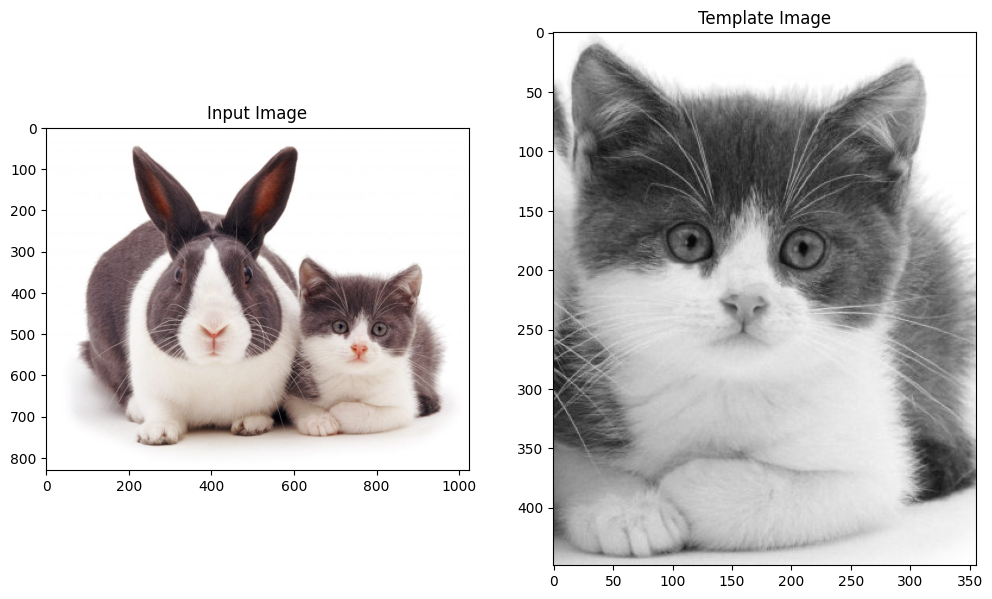

In [20]:
input = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/cats_and_bunnies.jpg')
input = cv.cvtColor(input,cv.COLOR_BGR2RGB)
gray_input = cv.cvtColor(input,cv.COLOR_RGB2GRAY)
template = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/cat2_templatejpg.jpg',0)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(input, cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(template, cmap='gray'), plt.title('Template Image')

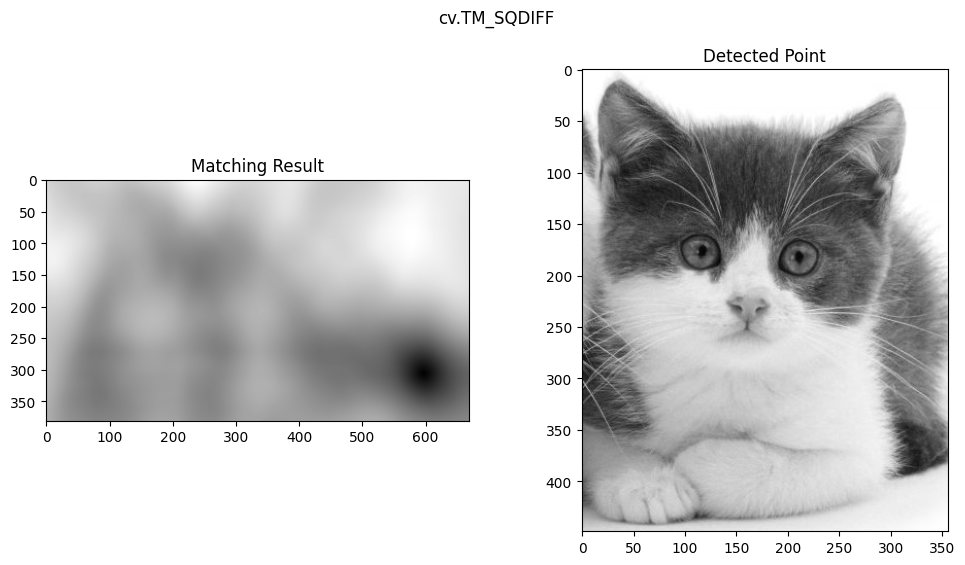

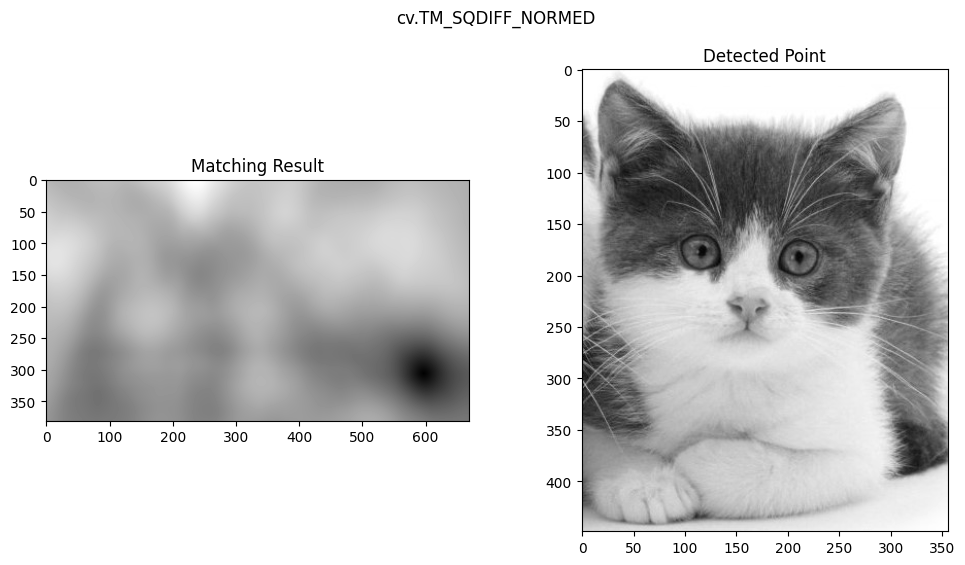

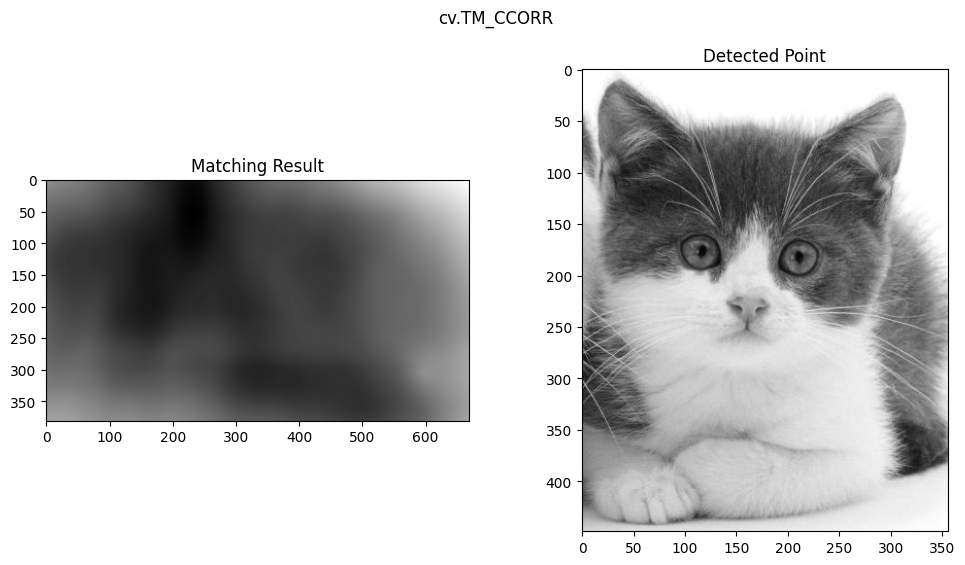

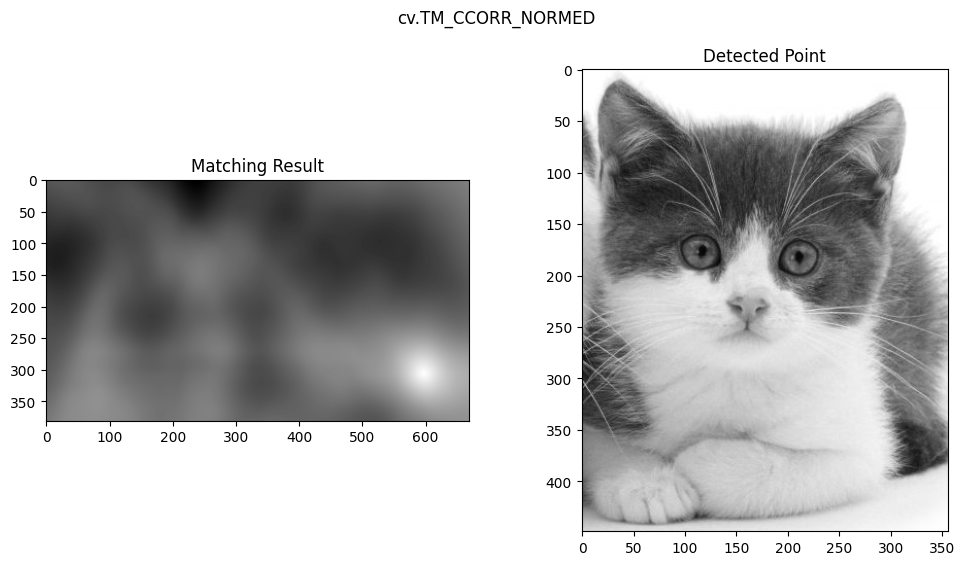

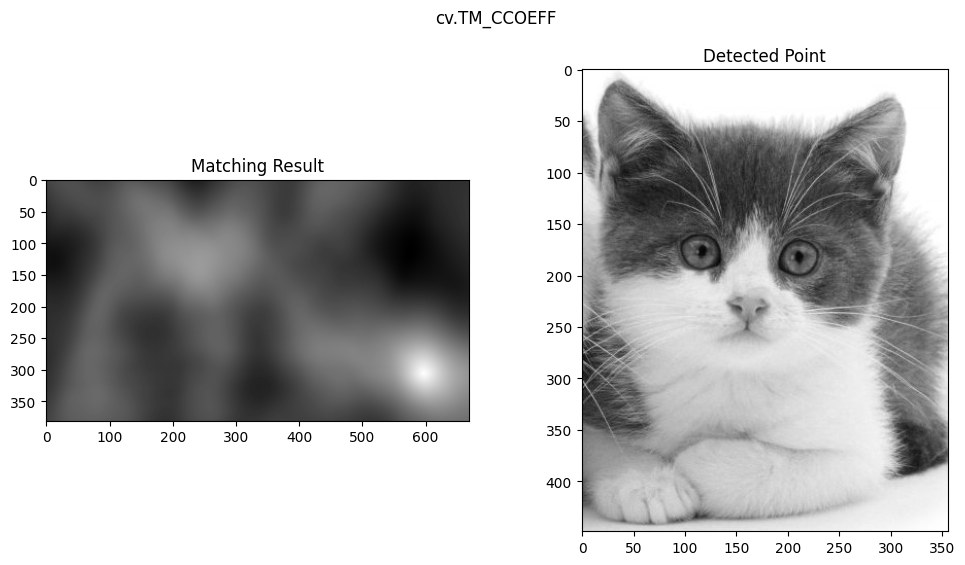

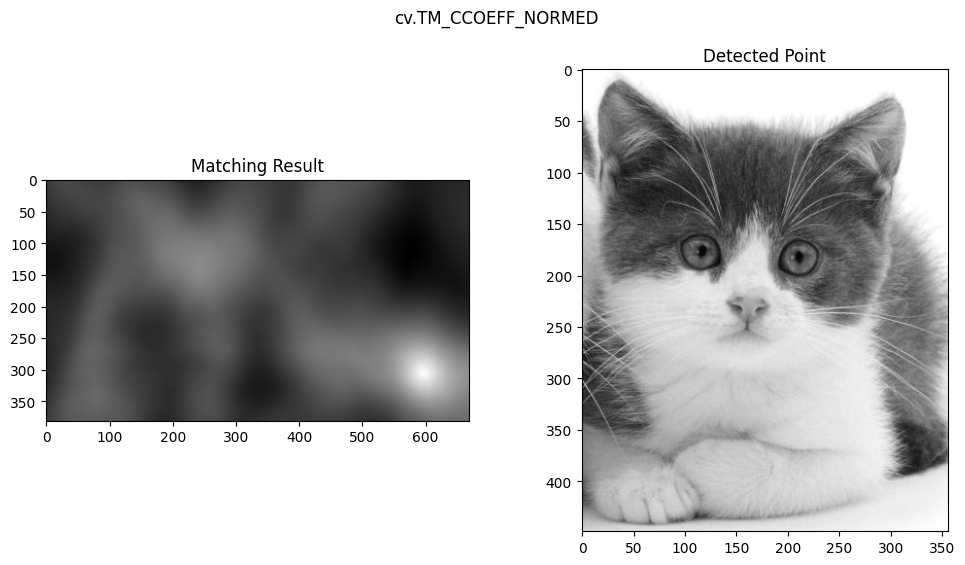

In [24]:
methods = ['cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED','cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED' ]

w, h = template.shape[::-1]
for meth in methods:
  img = gray_input.copy()
  method = eval(meth)
  result = cv.matchTemplate(img,template,method)

  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
  if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)

  cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)

  plt.figure(figsize=(12, 6))
  plt.suptitle(meth)
  plt.subplot(121), plt.imshow(result, cmap='gray'), plt.title('Matching Result')
  plt.subplot(122), plt.imshow(template, cmap='gray'), plt.title('Detected Point')

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

(<Axes: title={'center': 'Detected Point'}>,
 Text(0.5, 1.0, 'Detected Point'))

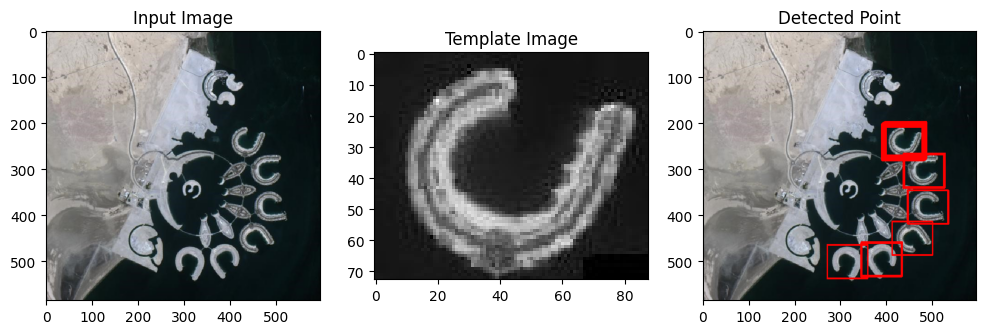

In [49]:
input = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/bahrain.jpg')
input = cv.cvtColor(input,cv.COLOR_BGR2RGB)
gray_input = cv.cvtColor(input,cv.COLOR_RGB2GRAY)
template = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/bahrain-template.jpg',0)

h, w = gray_input.shape
th, tw = template.shape
result = np.zeros((h - th + 1, w - tw + 1))

mean_template = np.mean(template)
std_template = np.std(template)
gray_img = gray_input - np.mean(gray_input)
gray_template = template - mean_template

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        patch = gray_img[i:i+th, j:j+tw]
        result[i, j] = np.sum((patch - mean_template) * gray_template) / (np.sqrt(np.sum(patch ** 2)) * np.sqrt(np.sum(gray_template ** 2)))

detected = input.copy()
threshold = 0.43
locations = np.where(result >= threshold)

for (x,y) in zip(*locations[::-1]):
   cv.rectangle(detected, (x, y), (x + tw, y + th),
		(255, 0, 0), 1)

plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(input, cmap='gray'), plt.title('Input Image')
plt.subplot(132), plt.imshow(template, cmap='gray'), plt.title('Template Image')
plt.subplot(133), plt.imshow(detected, cmap='gray'), plt.title('Detected Point')

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

**a. Sobel Edge Detection**

(<Axes: title={'center': 'Result Image'}>,
 Text(0.5, 1.0, 'Result Image'))

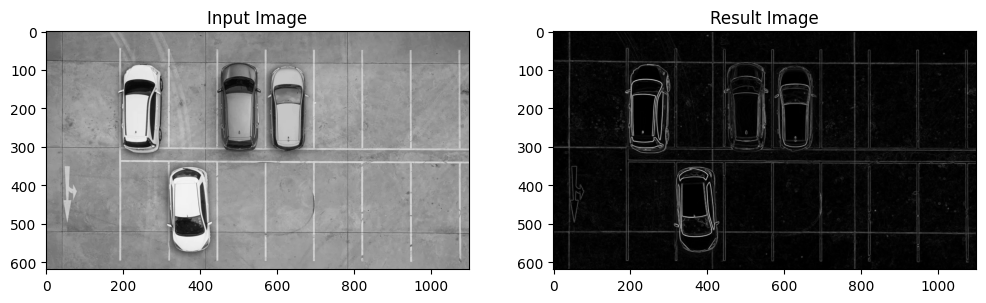

In [65]:
input = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/car-park.jpg',0)
sobel_x = cv.Sobel(input, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(input, cv.CV_64F, 0, 1, ksize=3)
sobel_xy = cv.magnitude(sobel_x, sobel_y)
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(input, cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(sobel_xy, cmap='gray'), plt.title('Result Image')


**b. Canny Edge Detection**

(<Axes: title={'center': 'Result Image'}>,
 Text(0.5, 1.0, 'Result Image'))

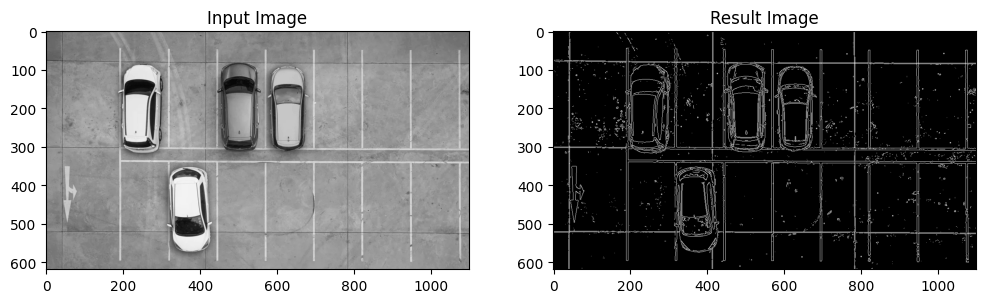

In [52]:
input = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/car-park.jpg',0)
canny = cv.Canny(input,100,100)
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(input, cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(canny, cmap='gray'), plt.title('Result Image')


**c. Laplacian Edge Detection**

(<Axes: title={'center': 'Result Image'}>,
 Text(0.5, 1.0, 'Result Image'))

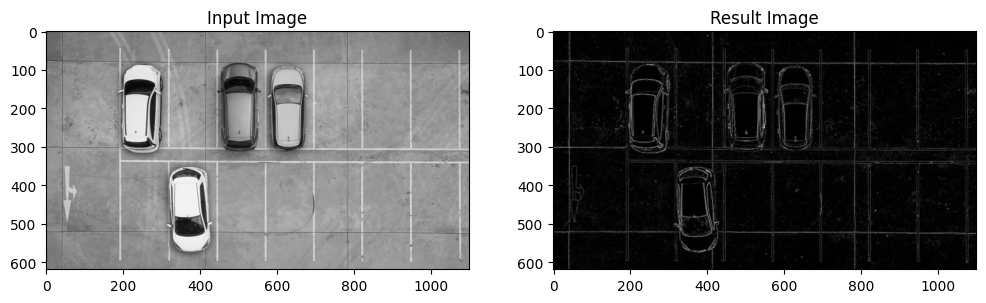

In [67]:
input = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/car-park.jpg',0)
laplacian = cv.Laplacian(input, cv.CV_64F)
laplacian_abs = cv.convertScaleAbs(laplacian)
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(input, cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(laplacian_abs, cmap='gray'), plt.title('Result Image')


5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

**a. Harris Corner Detection**

(<Axes: title={'center': 'Harris Corner Detection'}>,
 Text(0.5, 1.0, 'Harris Corner Detection'))

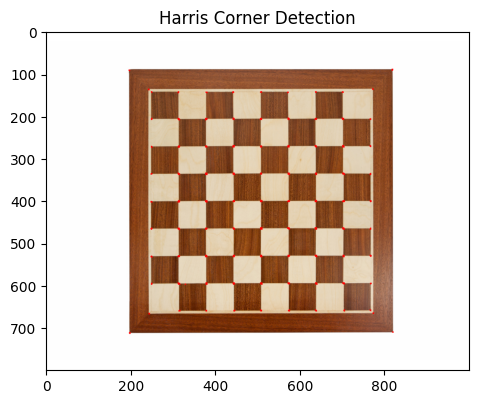

In [85]:
input = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/chess-board.jpg')
input = cv.cvtColor(input,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(input, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst,None)
input[dst>0.01*dst.max()]=[255,0,0]
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(input, cmap='gray'), plt.title('Harris Corner Detection')


**b. Shi-Tomasi Detection**

(<Axes: title={'center': 'Shi-Tomashi Corner Detection'}>,
 Text(0.5, 1.0, 'Shi-Tomashi Corner Detection'))

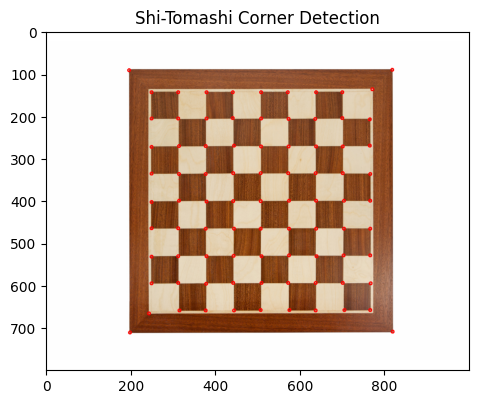

In [95]:
input = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/chess-board.jpg')
input = cv.cvtColor(input,cv.COLOR_BGR2RGB)
gray= cv.cvtColor(input, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray, 85,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input, (x,y),3,255,2)

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(input, cmap='gray'), plt.title('Shi-Tomashi Corner Detection')

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


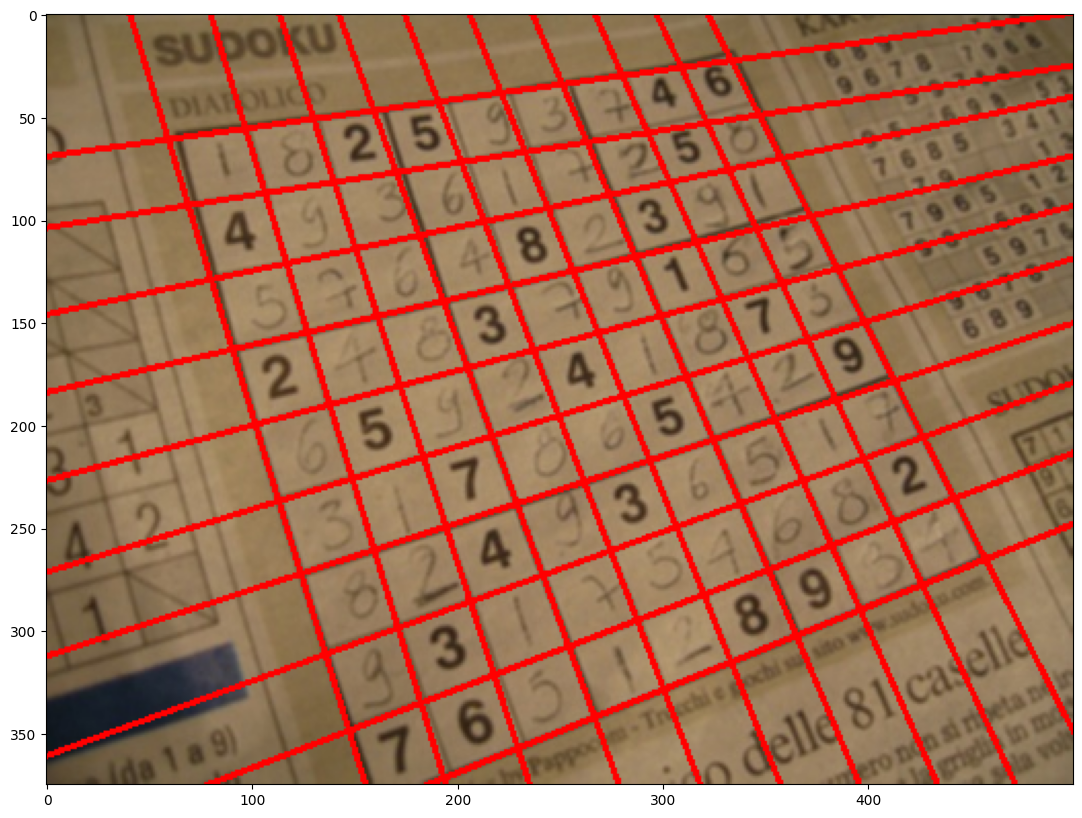

In [97]:

input = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/sudoku.jpg')
gray = cv.cvtColor(input, cv.COLOR_BGR2GRAY)

edges = cv.Canny (gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges, kernel, iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1

    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

(<Axes: title={'center': 'Contour Detection'}>,
 Text(0.5, 1.0, 'Contour Detection'))

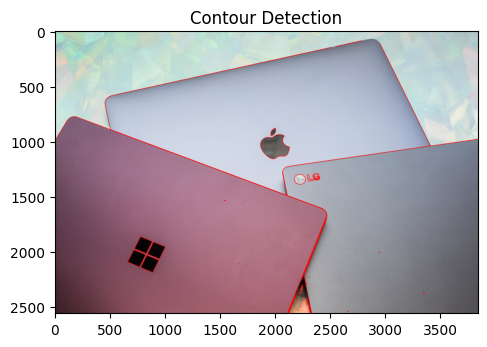

In [99]:
input = cv.imread('/content/drive/MyDrive/PCVK/Images/week-11/laptop.jpg')
input = cv.cvtColor(input,cv.COLOR_BGR2RGB)
gray= cv.cvtColor(input, cv.COLOR_BGR2GRAY)

edged = cv.Canny(gray, 30, 200)
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(input, contours, -1, (255,0,0), 3)

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(input, cmap='gray'), plt.title('Contour Detection')

## Pengayaan Materi KTP

(<Axes: title={'center': 'Contour Detection'}>,
 Text(0.5, 1.0, 'Contour Detection'))

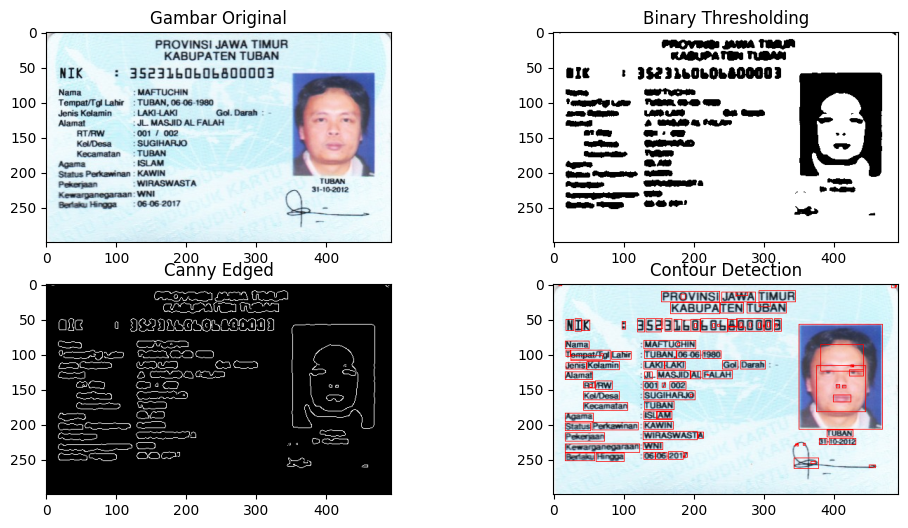

In [153]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp_more/ktp4.png')
ktp = cv.cvtColor(ktp,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(ktp, cv.COLOR_RGB2GRAY)
blurred = cv.GaussianBlur(gray, (5, 5), 100)
ret, thresh = cv.threshold(blurred.copy(), 127, 255, cv.THRESH_BINARY
+ cv.THRESH_OTSU)

detected = ktp.copy()
edged = cv.Canny(thresh, 400, 400)
contours, hierarchy = cv.findContours(edged, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), 1)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(ktp, cmap='gray'), plt.title('Gambar Original')
plt.subplot(222), plt.imshow(thresh, cmap='gray'), plt.title('Binary Thresholding')
plt.subplot(223), plt.imshow(edged, cmap='gray'), plt.title('Canny Edged')
plt.subplot(224), plt.imshow(detected, cmap='gray'), plt.title('Contour Detection')


## Tugas Praktikum

(<Axes: title={'center': 'Contour Detection'}>,
 Text(0.5, 1.0, 'Contour Detection'))

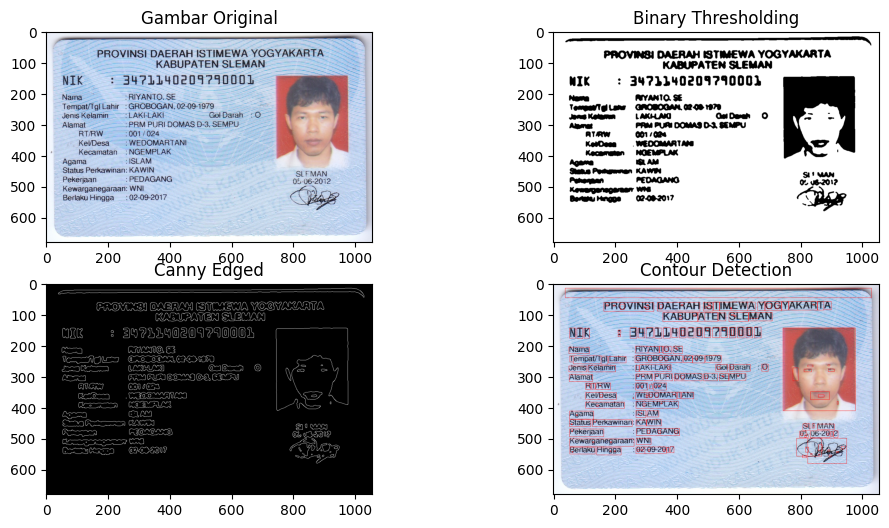

In [159]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp_more/ktp.png')
ktp = cv.cvtColor(ktp,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(ktp, cv.COLOR_RGB2GRAY)
ret, thresh = cv.threshold(blurred.copy(), 127, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
opened = cv.morphologyEx(thresh, cv.MORPH_OPEN,(3,3))

detected = ktp.copy()
edged = cv.Canny(opened, 400, 400)
contours, hierarchy = cv.findContours(edged, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), 1)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(ktp, cmap='gray'), plt.title('Gambar Original')
plt.subplot(222), plt.imshow(opened, cmap='gray'), plt.title('Binary Thresholding')
plt.subplot(223), plt.imshow(edged, cmap='gray'), plt.title('Canny Edged')
plt.subplot(224), plt.imshow(detected, cmap='gray'), plt.title('Contour Detection')
